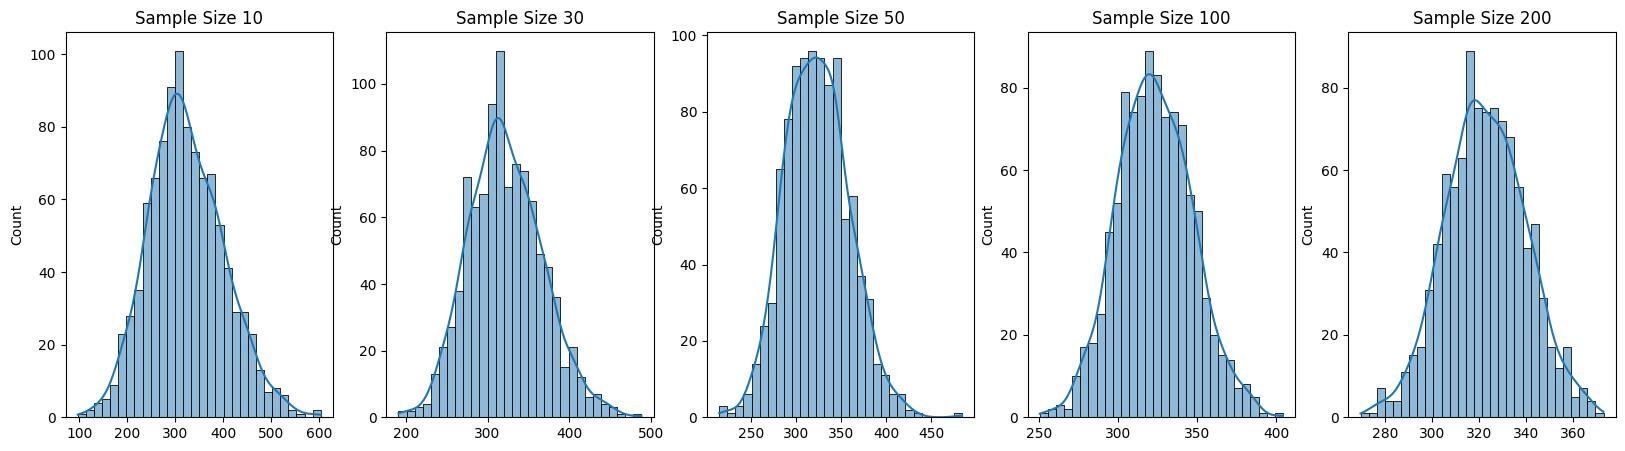

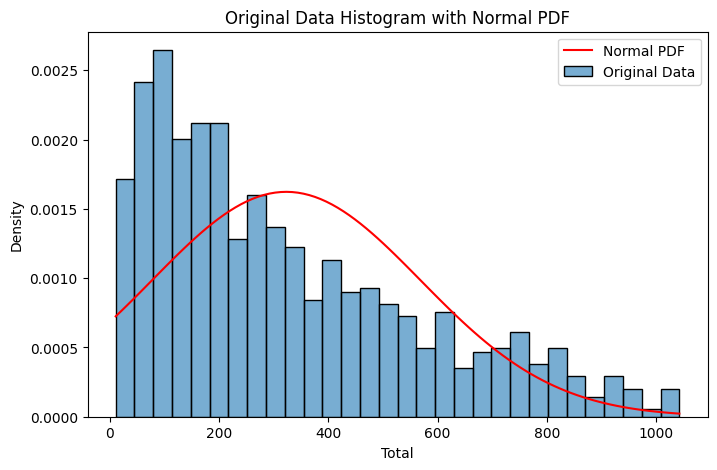

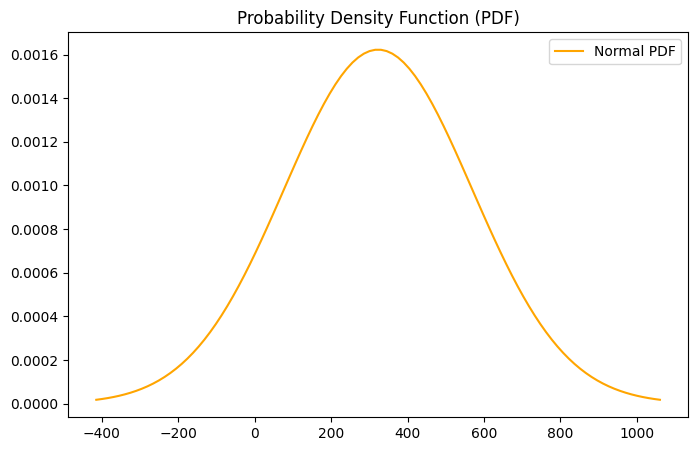

Mean: 322.966749
Standard Deviation: 245.88533510097207
Skewness (Original): 0.8912303920037631
Kurtosis (Original): -0.08746991289329031
Skewness (Sample Means): {10: 0.3151508749359376, 30: 0.2744703177905651, 50: 0.2406473708852072, 100: 0.12543723430266768, 200: 0.02342466167949074}
Kurtosis (Sample Means): {10: 0.08969932586796858, 30: 0.08789152247120757, 50: 0.22961076322856222, 100: -0.04394018936216515, 200: -0.09808339405458089}
99th Percentile: 950.26575
CDF at Mean: 0.5
95th Percentile in Normal Distribution: 727.412134255012


In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/content/supermarket_sales -.csv"
df = pd.read_csv(file_path)
num_col = "Total"
mean_val = df[num_col].mean()
std_val = df[num_col].std()
sample_sizes = [10, 30, 50, 100, 200]
sample_means = {size: [np.mean(np.random.choice(df[num_col], size)) for _ in range(1000)] for size in sample_sizes}
fig, axes = plt.subplots(1, len(sample_sizes), figsize=(20, 5))
for ax, size in zip(axes, sample_sizes):
    sns.histplot(sample_means[size], bins=30, kde=True, ax=ax)
    ax.set_title(f"Sample Size {size}")
plt.show()
skewness_original = stats.skew(df[num_col])
kurtosis_original = stats.kurtosis(df[num_col])
skewness_means = {size: stats.skew(sample_means[size]) for size in sample_sizes}
kurtosis_means = {size: stats.kurtosis(sample_means[size]) for size in sample_sizes}
percentile_99_value = np.percentile(df[num_col], 99)
random_data = np.random.normal(mean_val, std_val, 1000)
x = np.linspace(min(df[num_col]), max(df[num_col]), 100)
pdf_values = stats.norm.pdf(x, mean_val, std_val)
plt.figure(figsize=(8, 5))
sns.histplot(df[num_col], bins=30, kde=False, stat="density", alpha=0.6, label="Original Data")
plt.plot(x, pdf_values, label="Normal PDF", color="red")
plt.legend()
plt.title("Original Data Histogram with Normal PDF")
plt.show()
threshold = mean_val
cdf_value = stats.norm.cdf(threshold, mean_val, std_val)
percentile_95_value = stats.norm.ppf(0.95, mean_val, std_val)
x_vals = np.linspace(mean_val - 3 * std_val, mean_val + 3 * std_val, 100)
pdf_vals = stats.norm.pdf(x_vals, mean_val, std_val)
plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, label="Normal PDF", color="blue")
plt.title("Probability Density Function (PDF)")
plt.legend()
plt.show()
print(f"Mean: {mean_val}")
print(f"Standard Deviation: {std_val}")
print(f"Skewness (Original): {skewness_original}")
print(f"Kurtosis (Original): {kurtosis_original}")
print(f"Skewness (Sample Means): {skewness_means}")
print(f"Kurtosis (Sample Means): {kurtosis_means}")
print(f"99th Percentile: {percentile_99_value}")
print(f"CDF at Mean: {cdf_value}")
print(f"95th Percentile in Normal Distribution: {percentile_95_value}")
